# Assignment 3
# Part I: Windows-based stereo $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\longleftarrow 70\;pts$

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
from matplotlib.colors import LogNorm
from skimage import img_as_ubyte
from skimage.color import rgb2grey

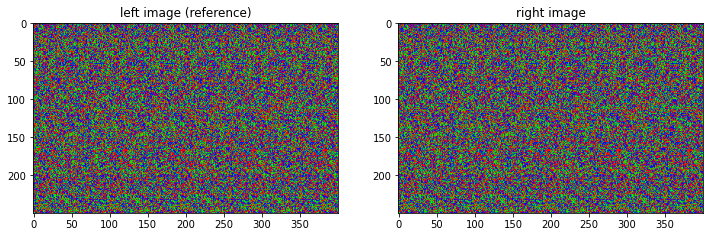

In [3]:
# you should use this random dot stereo pair for code developing/testing in Probelms 1-5
im_left = image.imread("images/stereo_pairs/rds_left.gif")
im_right = image.imread("images/stereo_pairs/rds_right.gif")

fig = plt.figure(figsize = (12, 5))
plt.subplot(121)
plt.title("left image (reference)")
plt.imshow(im_left)
plt.subplot(122)
plt.title("right image")
plt.imshow(im_right)

# the range of disparities for this random dot stereo pair 
d_min = 0
d_max = 2

### Problem 1: compute and visualize (as an image) an array of "squared differences" between RGB pixel values in the left and the right images. Treat each RGB pixel value as 3-vector and interprete "squared difference" as squared L2 norm of the difference between the corresponding vectors. 
###  HINT (important here and later): <font color=red> convert R, G, B values to floats to avoid severe "overflow" bugs </font> while adding small-range types (one-byte for $char$) or subtracting unsigned types. Note that $imshow$ function can display (as an image) any 2D array of floats.

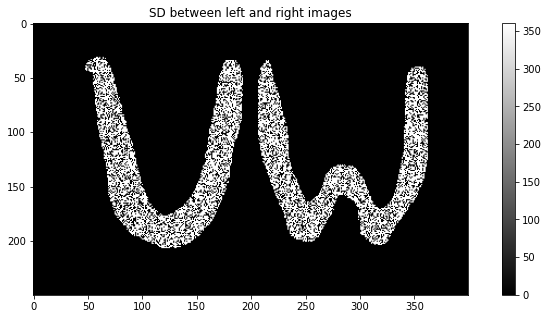

In [4]:
im_left = im_left.astype(np.float64)
im_right = im_right.astype(np.float64)
SD = np.linalg.norm(im_left[:,:,0:3] - im_right[:,:,0:3], axis=2)

fig = plt.figure(figsize = (12, 5))
plt.title("SD between left and right images")
plt.imshow(SD, cmap = "gray")
plt.colorbar()

### Problem 2: write function for computing squared differences between RGB pixel values in the reference (left) image and the "shifted" right image for ALL shifts/disparities $\Delta$ in the range $\Delta\in [d_{min},d_{max}]$. You should think about the correct direction of the shift. The output should be array $SD$ such that $SD[i]$ is an image of Squared Differences for shift $\Delta = d_{min} + i$ for any $i\in [0,d_{max}-d_{min}]$. 

In [5]:
def SD_array(imageL, imageR, d_minimum, d_maximum):
    imageL = imageL.astype(np.float64)
    imageR = imageR.astype(np.float64)
    # initialization of the array of "squared differences" for different shifts
    SD = np.zeros(
        (1 + d_maximum - d_minimum, np.shape(imageL)[0], np.shape(imageL)[1])
    )
    for i, d in enumerate(range(d_minimum, d_maximum + 1)):
        imageR_rolled = np.roll(imageR, d, axis=1)
        SD[i] = np.linalg.norm(
            imageL[:, :, 0:3] - imageR_rolled[:, :, 0:3], axis=2
        )

    return SD

### Use $\text{SD_array}$ function to compute SD images for the random dot stereo pair. Visualize such squared difference images for $\Delta=d_{min}$, $\Delta = d_{mid}\approx\frac{d_{min}+d_{max}}{2}$, and $\Delta=d_{max}$. Note that the first image should be identical to the one in Problem 1. (fully implemented)

(250, 400, 4)
(250, 400, 4)
(3, 250, 400)


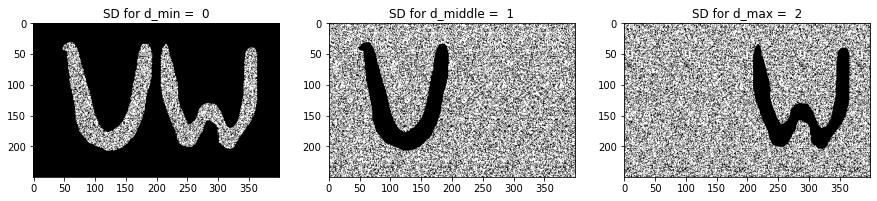

In [6]:
SD = SD_array(im_left, im_right, d_min, d_max)    
print(np.shape(im_left))
print(np.shape(im_right))
print(np.shape(SD))

fig = plt.figure(figsize = (15, 4))
plt.subplot(131)
plt.title('SD for d_min = {:>2d}'.format(d_min))
plt.imshow(SD[0], cmap = "gray")
plt.subplot(132) 
d_middle = round((d_min+d_max)/2)
plt.title('SD for d_middle = {:>2d}'.format(d_middle))
plt.imshow(SD[d_middle-d_min], cmap = "gray")
plt.subplot(133)
plt.title('SD for d_max = {:>2d}'.format(d_max))
plt.imshow(SD[d_max-d_min], cmap = "gray")
#plt.colorbar(cax=plt.axes([0.91, 0.25, 0.01, 0.5]))

### Problem 3: write function to compute an "integral image" for any given "scalar" image

In [7]:
# Function integral_image can be applied to any scalar 2D array/image. 
# This function should return a double/float64 (precision) array/image of the same size.
# NOTE: it is safer to explicitly specify double/float64 precision for integral images since 
# later we will be adding/subtracting ("differenting") their values in nearby pixels .

def integral_image(img):
    return np.cumsum(np.cumsum(img, axis=0), axis=1).astype(np.float)

### apply $\text{intergal_image}$ function to the "squared differences" (SD) for each disparity (fully implemented)

(3, 250, 400) (3, 250, 400)


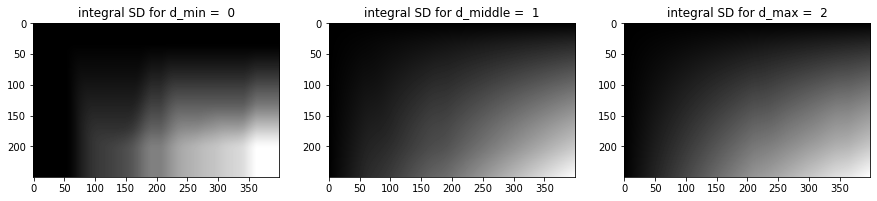

In [8]:
integral_SD = np.zeros(np.shape(SD))
print(np.shape(integral_SD),np.shape(SD))

for Delta in range(1+d_max-d_min):
    integral_SD[Delta] = integral_image(SD[Delta])
        
fig = plt.figure(figsize = (15, 4))
plt.subplot(131)
plt.title('integral SD for d_min = {:>2d}'.format(d_min))
plt.imshow(integral_SD[0], cmap = "gray")
plt.subplot(132) 
d_middle = round((d_min+d_max)/2)
plt.title('integral SD for d_middle = {:>2d}'.format(d_middle))
plt.imshow(integral_SD[d_middle-d_min], cmap = "gray")
plt.subplot(133)
plt.title('integral SD for d_max = {:>2d}'.format(d_max))
plt.imshow(integral_SD[d_max-d_min], cmap = "gray")
#plt.colorbar(cax=plt.axes([0.91, 0.2, 0.01, 0.6]))

### Problem 4: write function that sums the elements of the input image within fixed-size windows around image pixels. Note that this function should work for any (odd or even) values of parameter $\text{window_width}\in\{1,2,3,4,5,...\}$ according to the windows illustration below: <img src="images\windows.png">

In [9]:
# function windSum can be applied to any scalar 2D array/image. It should return an array/image where the value of 
# each element (pixel p) is the "sum" of the values in the input array/image within a window around element p.
# The return image should be of the same size/type and have its margins (around half-window width) filled with INFTY.
# NOTE: you should use function integral_image implemented earlier.
# HINT: you should use standard np.roll function to avoid double or triple for loops.
INFTY = np.inf


def windSum(img, window_width):
    integral_img = integral_image(img)
    br_window = integral_img
    bl_window = np.roll(integral_img, window_width, axis=1)
    bl_window[:, :window_width] = 0
    tr_window = np.roll(integral_img, window_width, axis=0)
    tr_window[:window_width, :] = 0
    tl_window = np.roll(
        np.roll(integral_img, window_width, axis=1), window_width, axis=0
    )
    tl_window[:, :window_width] = 0
    tl_window[:window_width, :] = 0
    wind_sum_offset = int(np.floor((window_width - 1) / 2))
    wind_sum_img = np.roll(
        np.roll(
            br_window - bl_window - tr_window + tl_window,
            -1 * wind_sum_offset,
            axis=1,
        ),
        -1 * wind_sum_offset,
        axis=0,
    )
    wind_sum_img[
        np.r_[:wind_sum_offset, -1 * wind_sum_offset : 0],
    ] = INFTY
    wind_sum_img[
        :,
        np.r_[:wind_sum_offset, -1 * wind_sum_offset : 0],
    ] = INFTY

    return wind_sum_img

### Compute SSD images for windows of different widths and for different disparities by applying $\text{windSum}$ function to the "squared differences" SD. Note that the results for windows of width 1 (the first row of the figure below) should look identical (except for the narrow "margin") to the results in Problem 2. (fully implemented)

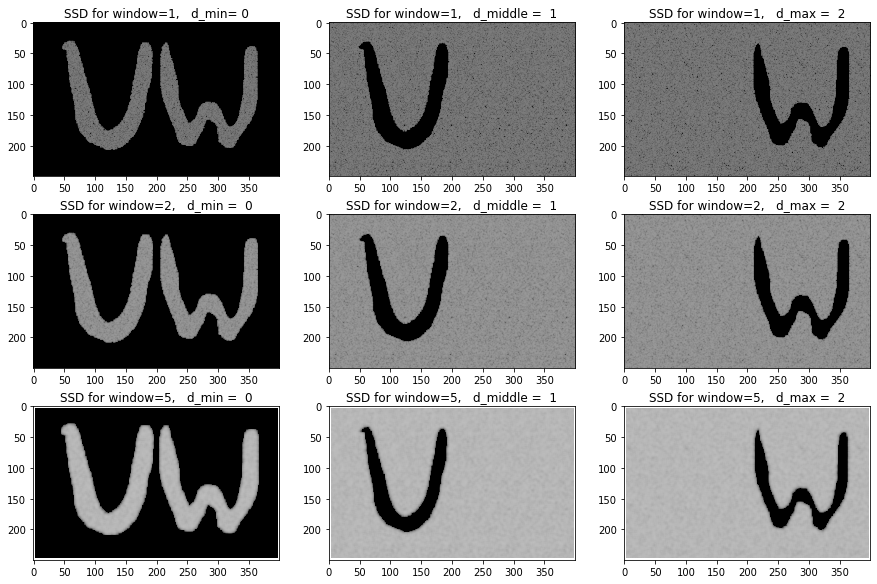

In [10]:
SSD1 = np.zeros(np.shape(SD))
SSD2 = np.zeros(np.shape(SD))
SSD5 = np.zeros(np.shape(SD))

for Delta in range(1+d_max-d_min):
    SSD1[Delta] = windSum(SD[Delta],1)
    SSD2[Delta] = windSum(SD[Delta],2)
    SSD5[Delta] = windSum(SD[Delta],5)
    
d_middle = round((d_min+d_max)/2)
        
fig = plt.figure(figsize = (15, 10))
plt.subplot(331)
plt.title('SSD for window=1,   d_min={:>2d}'.format(d_min))
plt.imshow(1+SSD1[0], cmap = "gray", norm=LogNorm(vmin=1, vmax=200000))
plt.subplot(332) 
plt.title('SSD for window=1,   d_middle = {:>2d}'.format(d_middle))
plt.imshow(1+SSD1[d_middle-d_min], cmap = "gray", norm=LogNorm(vmin=1, vmax=200000))
plt.subplot(333)
plt.title('SSD for window=1,   d_max = {:>2d}'.format(d_max))
plt.imshow(1+SSD1[d_max-d_min], cmap = "gray", norm=LogNorm(vmin=1, vmax=200000))
plt.subplot(334)
plt.title('SSD for window=2,   d_min = {:>2d}'.format(d_min))
plt.imshow(1+SSD2[0], cmap = "gray", norm=LogNorm(vmin=1, vmax=200000))
plt.subplot(335) 
plt.title('SSD for window=2,   d_middle = {:>2d}'.format(d_middle))
plt.imshow(1+SSD2[d_middle-d_min], cmap = "gray", norm=LogNorm(vmin=1, vmax=200000))
plt.subplot(336)
plt.title('SSD for window=2,   d_max = {:>2d}'.format(d_max))
plt.imshow(1+SSD2[d_max-d_min], cmap = "gray", norm=LogNorm(vmin=1, vmax=200000))
plt.subplot(337)
plt.title('SSD for window=5,   d_min = {:>2d}'.format(d_min))
plt.imshow(1+SSD5[0], cmap = "gray", norm=LogNorm(vmin=1, vmax=200000))
plt.subplot(338) 
plt.title('SSD for window=5,   d_middle = {:>2d}'.format(d_middle))
plt.imshow(1+SSD5[d_middle-d_min], cmap = "gray", norm=LogNorm(vmin=1, vmax=200000))
plt.subplot(339)
plt.title('SSD for window=5,   d_max = {:>2d}'.format(d_max))
plt.imshow(1+SSD5[d_max-d_min], cmap = "gray", norm=LogNorm(vmin=1, vmax=200000))

### Problem 5: write code for function computing "disparity map" from SSD arrays (as above) for each disparity in the range specified by integers $d_{min}$, $d_{max}$. It should return a disparity map (image). At each pixel, disparity map image should have disparity value corresponding to the minimum SSD at this pixel. For pixels at the margins, the disparity map should be set to zero. HINT: margin pixels are characterized by $INFTY$ values of $SSD$.

In [11]:
# You should use functions np.where (pointwise "if, then, else" operation) and np.minimum 
# (pointwise "minimum" operation)
# These functions will help to avoid double loops for traversing the pixels.
# WARNING: there will be a deducton for double-loops traversing pixels, but single loop to traverse disparities is OK.

def SSDtoDmap(SSD_array, d_minimum, d_maximum):

    dMap = np.full(np.shape(SSD_array[0]), d_minimum)
    min_SSD_tracker = SSD_array[0]
    for d, SSD in zip(range(d_minimum + 1, d_maximum + 1), SSD_array[1:]):
        changes = np.minimum(SSD, min_SSD_tracker)
        dMap[changes != min_SSD_tracker] = d
        min_SSD_tracker = changes
    dMap = np.where(min_SSD_tracker == INFTY, 0, dMap)

    return dMap

### Compute and show disparity map (fully implemented)

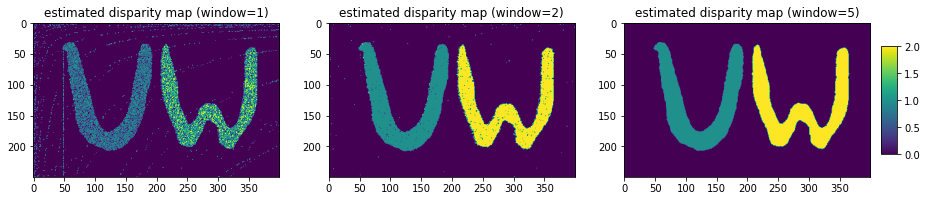

In [12]:
dMap1 = SSDtoDmap(SSD1,d_min,d_max)
dMap2 = SSDtoDmap(SSD2,d_min,d_max)
dMap5 = SSDtoDmap(SSD5,d_min,d_max)

fig = plt.figure(figsize = (15, 3))
plt.subplot(131)
plt.title("estimated disparity map (window=1)")
plt.imshow(dMap1, vmin = 0, vmax = d_max)
plt.subplot(132)
plt.title("estimated disparity map (window=2)")
plt.imshow(dMap2, vmin = 0, vmax = d_max)
plt.subplot(133)
plt.title("estimated disparity map (window=5)")
plt.imshow(dMap5, vmin = 0, vmax = d_max)
plt.colorbar(cax=plt.axes([0.91, 0.25, 0.015, 0.5]))

### Problem 6: test your code on a real stereo pair with ground truth (Tsukuba)

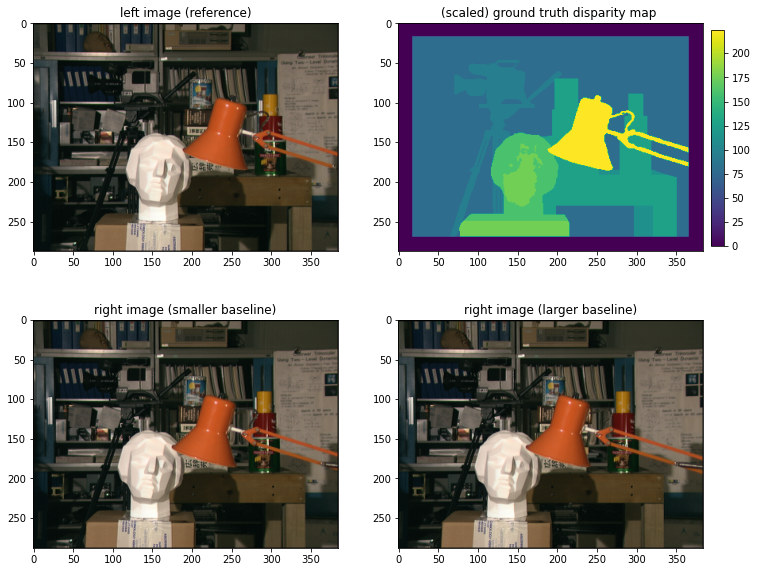

In [13]:
# images/tsukuba subdirectory contains (a subset of) "Tsukuba" stereo images that are probably 
# the oldest stereo data with dense ground-truth produced at the University of Tsukuba in 2001. 
# The full Tsukuba dataset and many other stereo images with ground-truth disparity maps can be
# downloaded from well-known Middlebury repository  http://vision.middlebury.edu/stereo/
im_left = image.imread("images/stereo_pairs/tsukuba/scene1.row3.col3.ppm")
im_gt = image.imread("images/stereo_pairs/tsukuba/truedisp.row3.col3.pgm")
im_right = image.imread("images/stereo_pairs/tsukuba/scene1.row3.col4.ppm")
im_right2 = image.imread("images/stereo_pairs/tsukuba/scene1.row3.col5.ppm")

fig = plt.figure(figsize = (12, 10))
plt.subplot(221)
plt.title("left image (reference)")
plt.imshow(im_left)
plt.subplot(222) 
plt.title("(scaled) ground truth disparity map ")
plt.imshow(im_gt)
plt.colorbar(cax=plt.axes([0.91, 0.557, 0.015, 0.3]))
plt.subplot(223)
plt.title("right image (smaller baseline)")
plt.imshow(im_right)
plt.subplot(224)
plt.title("right image (larger baseline)")
plt.imshow(im_right2)

### Note that the integer-valued ground truth image above represents scaled disparity values for the pixels in the reference (left) mage. The scale w.r.t. the smaller baseline right image ($\text{im_right}$) is 16 and for the larger baseline image ($\text{im_right2}$) is 8. Below, you should use the smaller-baseline right image ($\text{im_right}$). 

### Problem 6a: Using ground truth disparity map, estimate the range of disparity values between pixels in the left image ($\text{im_left}$) and the right image ($\text{im_right}$) .

In [14]:
# Solution: use standard functions to find min and max values in the ground truth disparity map. 
# You should ignore 0-valued margin!

im_gt = im_gt.astype(np.float64)
zeros_removed_im_gt = im_gt.copy()
zeros_removed_im_gt[zeros_removed_im_gt == 0] = INFTY
d_min = int(np.min(zeros_removed_im_gt) / 16)
d_max = int(np.max(im_gt) / 16)

### Compute squared differences using $\text{SD_array}$ function and visualize the results using logarithmic scale. Note that linear scale would make it hard to see smaller squared differences since there are many very large ones. (fully implemented)

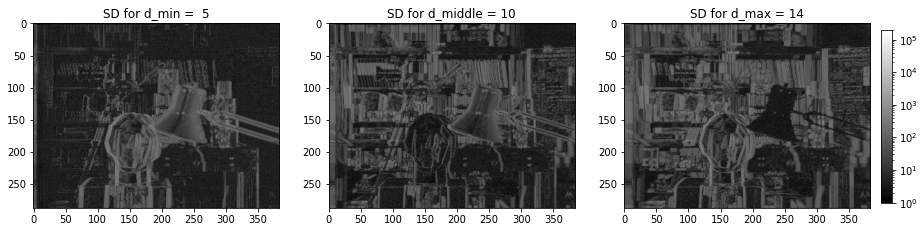

In [15]:
SD = SD_array(im_left, im_right, d_min, d_max)    
    
fig = plt.figure(figsize = (15, 4))
plt.subplot(131)
plt.title('SD for d_min = {:>2d}'.format(d_min))
plt.imshow(im_left)
plt.imshow(1+SD[0], cmap = "gray", norm=LogNorm(vmin=1, vmax=200000))
plt.subplot(132) 
d_middle = round((d_min+d_max)/2)
plt.title('SD for d_middle = {:>2d}'.format(d_middle))
plt.imshow(1+SD[d_middle-d_min], cmap = "gray", norm=LogNorm(vmin=1, vmax=200000))
plt.subplot(133)
plt.title('SD for d_max = {:>2d}'.format(d_max))
plt.imshow(1+SD[d_max-d_min], cmap = "gray", norm=LogNorm(vmin=1, vmax=200000))
plt.colorbar(cax=plt.axes([0.91, 0.2, 0.01, 0.6]))

### Problem 6b: Explain the differences you observe above:

answer:

For the image on the left (with the smallest disparity value), items like the bookshelf are darker. The bookshelf is dark because the calculated SSD between the reference image and the shifted image with this small disparity is low. A low SSD means the bookshelf has correspondance with a small disparity and which means we can conclude that the bookshelf is far way from us.

Likewise, for the images on the right (with the highest disparity value), items like the lamp are darker. The lamp is dark because it has a low SSD at this high disparity. This correspondance with a high disparity means we can conclude that the lamp is close to us.

Finally, the middle disparity shows that items in between the lamp and bookshelf have a low SSD such as the statue and table it is on. This means the statue is in between the lamp and the bookshelf at a medium depth away from the camera.

### Problem 6c: Write function $\text{Dmap_Windows}$ that returns disparity map from a given stereo pair (left and right image), specified disparity range, and window size. Your implementation should combine functions implemented and debugged earlier ($\text{SD_array}$, $\text{windSum}$, and $\text{SSDtoDmap}$).

In [16]:
def Dmap_Windows(imageL, imageR, d_minimum, d_maximum, window_width):
    SSDs = SD_array(imageL, imageR, d_minimum, d_maximum)
    SSD_sums = []
    
    for Delta in range(1 + d_maximum - d_minimum):
        SSD_sums.append(windSum(SSDs[Delta], window_width))
    
    dMap = SSDtoDmap(SSD_sums, d_minimum, d_maximum)
    
    return dMap

### Compute and show disparity maps for Tsukuba using small and large windows. (fully implemented)

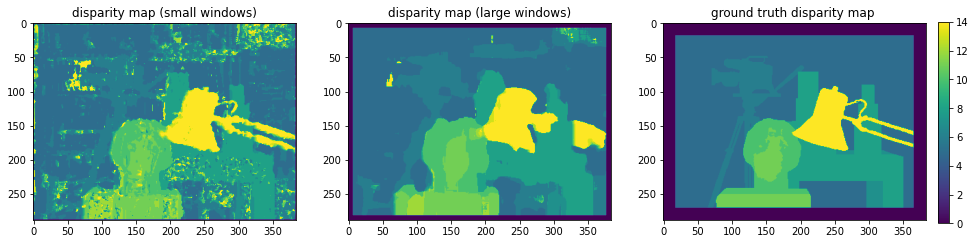

In [17]:
dispMap_small = Dmap_Windows(im_left, im_right, d_min, d_max, 4)
dispMap_large = Dmap_Windows(im_left, im_right, d_min, d_max, 15)

fig = plt.figure(figsize = (16, 7))
plt.subplot(131)
plt.title("disparity map (small windows)")
plt.imshow(dispMap_small, vmin = 0, vmax = d_max)
plt.subplot(132)
plt.title("disparity map (large windows)")
plt.imshow(dispMap_large, vmin = 0, vmax = d_max)
plt.subplot(133) 
plt.title("ground truth disparity map ")
plt.imshow(im_gt/16, vmin = 0, vmax = d_max)
plt.colorbar(cax=plt.axes([0.91, 0.3, 0.01, 0.4]))

# Part II: Scan-line stereo   $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\longleftarrow 30\;pts$

### Problem 7(a):  Program $Viterbi$ approach discussed in class and apply it to Tsukuba example. For the photo-consistency term  of the loss function (objective function) you can use previously implemented $\text{SD_array}$ $$D_p(d) = |I_p-I_{p+d}|^2 \;\;\;\;\;\longleftarrow\;\;\;\; \text{SD_array}[d][p] $$ that for every pixel $p$ defines the cost for every possible disparity value $d\in\{d_{min},...,d_{max}\}$. The regularization term should be as discussed in class $$V_{pq}(d_p,d_q) = w|d_p-d_q|$$ where you can select some good value for parameter $w$ empirically (start from $w\approx 0$).  Discuss the differences with the window-based stereo results above.

### NOTE: You should implement $Viterbi$ optimization yourself - it was fully covered in class. Organize your code (e.g. add cells, introduce functions, write comments, ect) as part of your mark will depend on clarity. The main iteration of the forward pass in Viterbi ($m^2$-complexity operation for each pair of neighboring pixels on a scan-line) can be implemented as a separate function. You can avoid double for-loops using functions like  𝑛𝑝.𝑤ℎ𝑒𝑟𝑒 ,  𝑛𝑝.𝑚𝑖𝑛𝑖𝑚𝑢𝑚 ,  𝑛𝑝.𝑠𝑞𝑢𝑎𝑟𝑒 ,  𝑛𝑝.𝑜𝑔𝑟𝑖𝑑  or others similar general "vectorized" functions in numpy that alow to avoid multi-loops over matrix (image) elements (pixels).

In [18]:
def w_identity_multiplier(imageL, imageR):
    return np.ones(imageL.shape[:2])

def absolute_loss_function(grid_dimension):
    disparitiesDiffGrid = np.ogrid[0:grid_dimension, 0:grid_dimension]
    return np.abs(disparitiesDiffGrid[0] - disparitiesDiffGrid[1])

def Viterbi_const_w(
    imageL,
    imageR,
    d_minimum,
    d_maximum,
    W,
    h=1,
    loss_func=absolute_loss_function,
    T=np.inf,
    w_func=w_identity_multiplier,
):
    # Sum of Square Distances - With Window Sum
    SSDs = np.array(
        [
            windSum(SD, h)
            for SD in SD_array(imageL, imageR, d_minimum, d_maximum)
        ]
    )

    # Track number of disparities in range (d_minimum, d_maximum)
    num_disparities = d_maximum - d_minimum + 1

    # Track all sum of cost for best backwards path for each disparity for each
    # row
    previous_costs = np.zeros((imageL.shape[0], num_disparities))

    # Track the entire backwards path of disparities for each disparity for
    # each row
    disparities_tracker = np.array([]).reshape(
        imageL.shape[0], num_disparities, 0
    )

    # Get the spatial map from the loss function - default: absolute loss
    spatial_img_map = (
        W
        * w_func(imageL, imageR)[:, :, None, None]
        * loss_func(num_disparities)
    )
    spatial_img_map = np.where(spatial_img_map < T, spatial_img_map, T)

    for col_i_costs, spatial_coherency in zip(
        SSDs.transpose(2, 1, 0), spatial_img_map.transpose(1, 0, 2, 3)
    ):

        photo_consistency = previous_costs + col_i_costs

        cumul_col_i_costs = photo_consistency[:, None] + spatial_coherency
        previous_costs = np.min(cumul_col_i_costs, axis=2)

        # If all options are "infty" that means they are invalid and have
        # equivalent loss. Make them all 0 loss so they don't overpower later
        # valid options. (Only needed with h > 1).
        previous_costs[np.all((previous_costs == INFTY), axis=1)] = 0
        
        disparities_tracker = np.append(
            disparities_tracker,
            np.argmin(cumul_col_i_costs, axis=2)[:, :, None],
            axis=2,
        )
        
        # If the all the options were infty, the options were actually invalid.
        # Set it up so that they get a disparity of 0 in the final disparity
        # map.
        disparities_tracker[
            np.all(np.all((cumul_col_i_costs == INFTY), axis=2), axis=1), :, -1
        ] = (-1 * d_minimum)

    dMap = (
        disparities_tracker[
            range(imageL.shape[0]), np.argmin(previous_costs, axis=1), :
        ]
        + d_minimum
    )

    return dMap


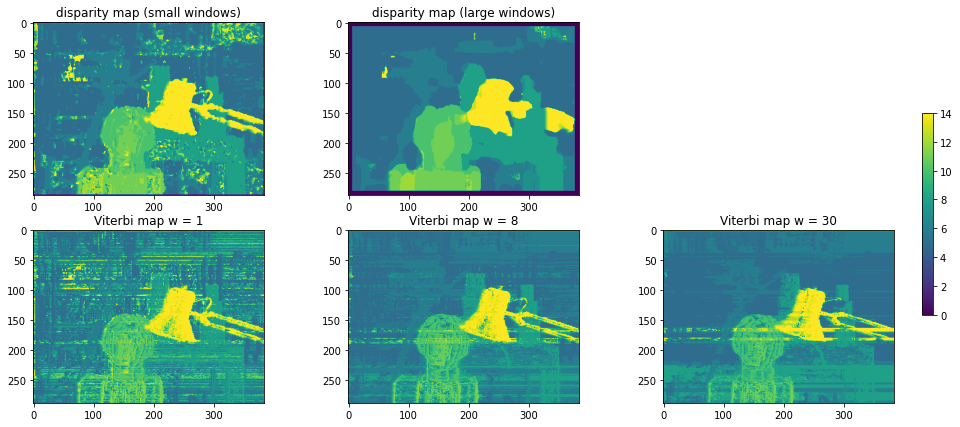

In [19]:
fig = plt.figure(figsize = (16, 7))
plt.subplot(231)
plt.title("disparity map (small windows)")
plt.imshow(dispMap_small, vmin = 0, vmax = d_max)
plt.subplot(232)
plt.title("disparity map (large windows)")
plt.imshow(dispMap_large, vmin = 0, vmax = d_max)

counter = 4
for w in [1, 8, 30]:
    plt.subplot(230 + counter)
    plt.title("Viterbi map w = {}".format(w))
    viterbi_map = Viterbi_const_w(im_left, im_right, d_min, d_max, w)
    plt.imshow(viterbi_map, vmin = 0, vmax = d_max)
    counter += 1

plt.colorbar(cax=plt.axes([0.91, 0.3, 0.01, 0.4]))

Comments:

In the plots above, we see how the Viterbi algorithm produces a much better disparity map than the window plots. A small window defines image boundaries more clearly but does so with noise-y errors. A large window is less clear on the image boundaries but has less noise in its map.

Viterbi is able to very precisely define object boundaries using its algorithm where it uses absolute loss to penalize jumps in disparities between pixels. However, as expected, since Viterbi only optimizes each scan line and the scan lines **do not talk to each other** there are streaking line artifcats that appear on the image and cause noise.

We empirically found that a value of w=8 was the best value. Much lower than this and the objects like the lamp were clearly defined by the camera at the back is not perceivable. Much higher than this and the streaking artifacts for close images like the lamp or desk became really bad like the solid green lines at the bottom. Even the camera is noise-y. Right in the middle at w=8 we can make out the camera and some of the books at the back but even still some streaking lines remain.

### Problem 7(b): Test the case where the photoconsistency term $D_p(d)$ is computed by averaging SD in some small window of size $h$. That is, for each disparity $d$ you should replace 2D array $\text{SD_array}(d)$ in Problem 7(a) by $$\text{SD_array}(d)   \;\;\;\;\;\longleftarrow\;\;\;\;  windSum(SD(d),h).$$ Compare the results for different window sizes $h\in\{1,3,5\}$. Feel free to fine tune regularization parameter $w$ for each case trying to obtain the better results. 
### NOTE 1: $h=1$ should be equivalent to Problem 7(a) above. 
### NOTE 2: this version combines window-based stereo with regularization along scan-lines. The case when $w=0$ should give the same results as in Problem 6(c).  

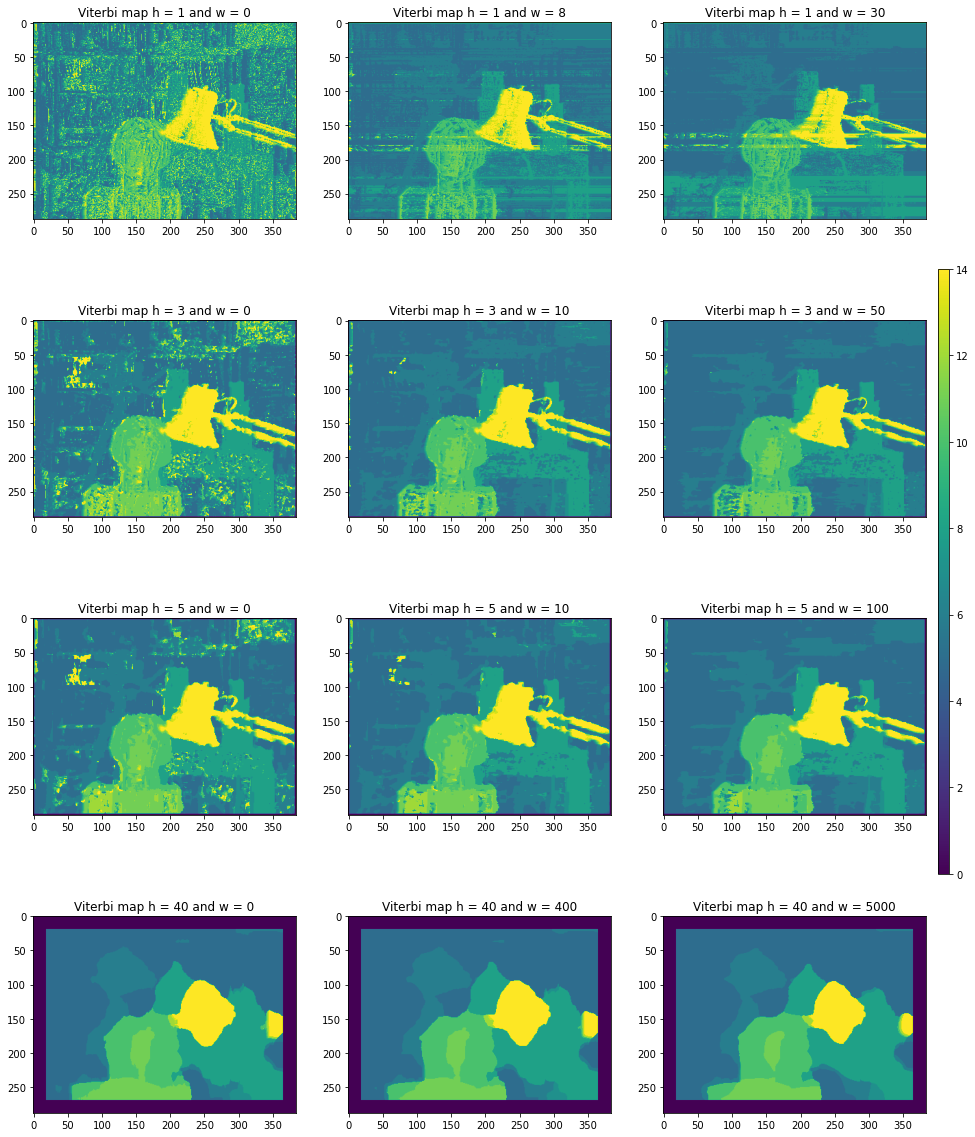

In [20]:
fig = plt.figure(figsize = (16, 21))
counter = 1

h = 1
for w in [0, 8, 30]:    
    plt.subplot(4, 3, counter)
    plt.title("Viterbi map h = {} and w = {}".format(h, w))
    viterbi_map = Viterbi_const_w(im_left, im_right, d_min, d_max, w, h=h)
    plt.imshow(viterbi_map, vmin = 0, vmax = d_max)
    counter += 1

h = 3
for w in [0, 10, 50]:    
    plt.subplot(4, 3, counter)
    plt.title("Viterbi map h = {} and w = {}".format(h, w))
    viterbi_map = Viterbi_const_w(im_left, im_right, d_min, d_max, w, h=h)
    plt.imshow(viterbi_map, vmin = 0, vmax = d_max)
    counter += 1

h = 5
for w in [0, 10, 100]:    
    plt.subplot(4, 3, counter)
    plt.title("Viterbi map h = {} and w = {}".format(h, w))
    viterbi_map = Viterbi_const_w(im_left, im_right, d_min, d_max, w, h=h)
    plt.imshow(viterbi_map, vmin = 0, vmax = d_max)
    counter += 1

h = 40
for w in [0, 400, 5_000]:    
    plt.subplot(4, 3, counter)
    plt.title("Viterbi map h = {} and w = {}".format(h, w))
    viterbi_map = Viterbi_const_w(im_left, im_right, d_min, d_max, w, h=h)
    plt.imshow(viterbi_map, vmin = 0, vmax = d_max)
    counter += 1
plt.colorbar(cax=plt.axes([0.91, 0.3, 0.01, 0.4]))

Comments:
    
The most important observations here are that large windows **allow the rows to talk to each other** which helps to **remove streak lines** but which causes **blurring of the object boundaries** because windows contain **multiple different disparities** when they are calcuated at the boundaries which misrepresents the pixel and causes blurring.

That is why a small window was useful as seen in the middle plot with window size h=5 and w=8 as seen above. It removed streak lines but did so at the cost of a little blurring of finer details like those on the lamp. This is a tradeoff.

Further we notice that experimenting for different values of `w` was useful for some windows. In the `h=3` window, increasing values of `w` produced better and better results. The value of `w=50` was able to remove small noise-y patches of high disparity values at the top left of the camera and for some items at the back bookshelfs which produces a clear picture. For the `h=5`, this value need to be _higher_. For the same `w=10` value it had more noise and to achieve the same quality with less noise it need up to `w=100` for its disparity map. However the bigger window still caused more blurring. This was not true for the last row with the very large `h=40` window. In our experiments, it took very large `w` values to change the picture and it did not make them better.

We also notice that the windows with length larger than 1 causes more data to be lost because of how the window takes the sum of the elements in a square to represent that region at a single pixel. At the boundaries, there are not enough pixels to complete the sum so the pixel is given a disparity of 0 to mark it as invalid. The larger the window the larger this invalid boundary is.

### Problem 8 [optional, small bonus]: test the performance for quadratic and (robust) truncated-quadratic regularization terms $$V_{pq}(d_p,d_q) = w|d_p-d_q|^2\;\;\;\text{and}\;\;\;\;V_{pq}(d_p,d_q) = min\{w|d_p-d_q|^2,T\}.$$ Discuss the results.

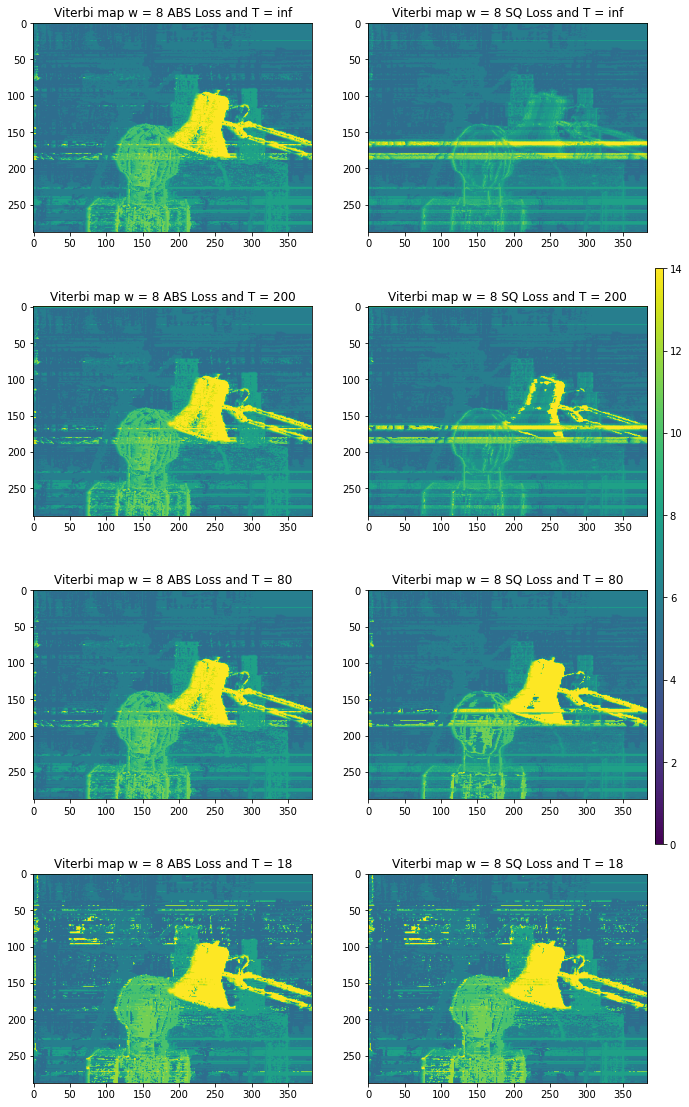

In [21]:
def squared_loss_function(grid_dimension):
    disparitiesDiffGrid = np.ogrid[0:grid_dimension, 0:grid_dimension]
    return np.square(np.abs(disparitiesDiffGrid[0] - disparitiesDiffGrid[1]))


fig = plt.figure(figsize=(11, 20))
counter = 1
for T in [INFTY, 200, 80, 18]:
    for func_name, loss_function in zip(
        ["ABS", "SQ"], [absolute_loss_function, squared_loss_function]
    ):
        plt.subplot(4, 2, counter)
        plt.title("Viterbi map w = 8 {} Loss and T = {}".format(func_name, T))
        viterbi_map = Viterbi_const_w(
            im_left, im_right, d_min, d_max, 8, loss_func=loss_function, T=T
        )
        plt.imshow(viterbi_map, vmin=0, vmax=d_max)
        counter += 1
plt.colorbar(cax=plt.axes([0.91, 0.3, 0.01, 0.4]))

Answer:

On the first row we compare the results of the square loss function against the absolute loss function **without any threshold value** (or very **high threshold**).

First we see that the square loss function magnifies the streak line mistakes of the absolute function disparity map and is in that sense **worse**. This makes sense because with **a square loss function** the results are **more sensitive to outlier values** and here the outlier values are the noise-y wrongly classified disparity values along the streak lines. This is because when calculating the disparity differences, the spatial coherency function **seriously penalizes large jumps in disparity** by taking the **square** of the difference instead of just the **absolute** difference.

Second, we notice that the details of the statue and lamp are more pronounced with the squared loss function. This isn't ideal when compared against the original ground truth disparity map. In the ground truth map, the lamp is yellow to indicate that it is the closest to the cameras. However in this new squared loss function, it implied that the lamp is at the same disparity of the statue. This makes sense because in addition to heavily penalizing large jumps in disparities, **the square loss function** heavily **rewards closeby disparities** better than the absolute loss function. This is because of the curved shape it has near the origin which only gives a small error to close disparities. This is not ideal.

Next, we can add a threshold parameter to the loss functions. We note that **if the threshold is too small**, the **results become more noise-y**. This makes sense because with a small threshold value large jumps which normally would have **high costs have been brought down** and their cost becomes comparable to small jumps when they should not be. In fact, for the low value of T=18 the square loss and absolute loss **look about the same** because the square loss never has a chance to grow really big because the threshold stops it from doing so. The threshold value has to get very low to affect the absolute error cost much at all. This is because the absolute value loss function only grows as large as the difference bewtween the largest jump of disparities `d_maximum - d_minimum` which for this picture was found to be 9.

Finally, we discuss the effects of an in-between threshold value. The only interesting effects were on the square loss functions. An **appropriate threshold improved the results of the square loss function** because the lamp is once again yellow like the ground truth disparity map. In fact, a low threshold of 80 was able to completely restore its shape at the approriate close disparity level. This makes sense because **adding a threshold improves the robustness of the square loss function to outliers**. Instead of growing very large for very big disparities, the threshold stops it from growing too much and gives these errors a capped value. However, the loss function retains its convex value near small disparity discrepancies which helps it **reward disparities that are nearby**. This can be see in the following figure: (**PLEASE NOTE** The images aren't rendering in my Chrome Browser when I generate the PDF... You can see this if you run the notebook or go to the images/Threshold_Adds_robustness.png file in the submission folder)

<img src="images\Threshold_Adds_Robustness.png">

Although there is still significant noise, we observe major improvements in the square loss function with threshold of 80. Sections that are at the _same_ disparity are **defined better than the absolute loss function** such as the inner parts of the statue and the lamp. This is because the square loss function takes advantage of its convex bottom near the origin without suffering from huge sesitivity thanks to the threshold. The facial features of the statue can be seen clearly because similar disparities have more incentive to be similar to their neighbors. However, large streak lines still appear here so the absolute loss function is still preferred and more experiments with the threshold may be required.

### Problem 9 [optional, small bonus]: test the case where regularization weight $w=w_{pq}$ depends on a specific pair of neighboring points. That is, $$V_{pq}(d_p,d_q) = w_{pq}|d_p-d_q|.$$ It is common to use local intensity contrast in the reference image to set such weights, for example $$w_{pq}=w\exp\frac{-\|I_p-I_q\|^2}{2\sigma^2}$$ which weighs the overall regularization constant $w$ by a Gaussian kernel (in RGB or grey-scale space). The latter makes it cheaper to draw large disparity jumps at "contrast edges" or "contrast boundaries" that are likely to happen at object boundaries. Note that bandwith parameter $\sigma$ is important - it controls sensitivity to contrast. Discuss the results.

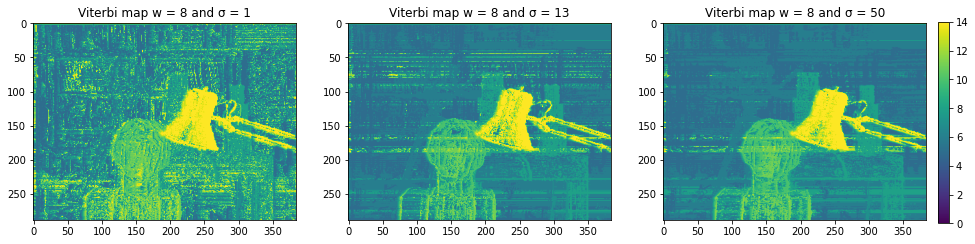

In [22]:
def w_norm_multiplier(imageL, imageR, sigma):
    denominator = 2 * sigma ** 2
    grid = np.exp(-1 * np.sum((imageL - imageR) ** 2, axis=2) / denominator)
    return grid

fig = plt.figure(figsize = (16, 7))
counter = 1
for sigma in [1, 13, 50]:    
    plt.subplot(1, 3, counter)
    plt.title("Viterbi map w = 8 and σ = {}".format(sigma))
    viterbi_map = Viterbi_const_w(
        im_left,
        im_right,
        d_min,
        d_max,
        8,
        w_func=lambda imageL, imageR: w_norm_multiplier(imageL, imageR, sigma),
    )
    plt.imshow(viterbi_map, vmin = 0, vmax = d_max)
    counter += 1

plt.colorbar(cax=plt.axes([0.91, 0.3, 0.01, 0.4]))

Answer:

In this problem, we support a different weighting of the disparities than just simpliy using the `w` parameter. In addition to using that, the spatial coherency term is now multiplied by a factor equally to **the discrepancy between the pixel contrasts**. This is irrespestive of the densitiy. Instead, all that matters is how close left and right pixels are in constrast color as the rows are traversed from left to right along the columns.

In this way, pixels with **large contrast discrepancies** are **penalized with large multipliers** for the spatial coherency term of the energy function. On the other hand, pixels with **small contrast discrepancies** are **rewarded with small mulipliers** for the spatial coherency term of the energy function. This can be done to motivate matches between pixels which have similar contrasts.

Finally, the creation of this weight grid uses a **gaussian distribution** when computing the weights for neighboring pixels. The standard deviation parameter $\sigma$ _is normally_ (but not always) used to represent the distribution of possible contrasts which should help scale the squared euclidean distance between pixel contrasts so that the multplication factor introduced by this grid is on a reasonable scale and multplications do not get too out of hand.

In the plots below, we show the effects of different values of sigma. With **really small values of sigma**, the results are very noise-y. This makes sense because small sigma means that the exponential grows very large. The reciprocal of a very large exponential makes the grid is **a grid full of 0s**. This completely wipes out the work of the original `w` parameter and is as if we were running Viterbi with just `w=0` so bad results are observed.

Next on the other extreme, we see that as we increase the value for sigma, results improve from the previous small sigma case. This makes sense because **an infitely large value of sigma** means the exponential is to the power of 0 and is just 1. This means the grid is **a grid full of 1s**. With that, the disparity map returned is that from only `w=w` alone and the grid is not doing anything helpful.

Finally, we comment on the effect of a medium size sigma. With a medium size the benefit is that **the grid contains a distinct value on the range from 0 to 1 meant to describe the discrepancy in contrast at that given transition between the pixels**. This new information helps the algorithm make a better decision about how to penalize or reward the change in disparity values.

Even so, **our results did not see much improvement**. This may be due to the use of only a single sigma value for images which have R, G, B, and alpha components. We might have seen **improvements if we used separate sigma values for each component** to account for their individual distributions acrros the 0 to 255 or 0 to 1 ranges. This is further complicated by the books in the background, which already are very noise-y and which have contrasts which are changing a lot even though the items are at the same depth.